# Исследование надежности заемщиков

Это первая часть проекта, она будет проверена автоматически. Вторую часть проверит ревьюер. 

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import pandas as pd # импортируйте библиотеку pandas

In [ ]:
data = pd.read_csv('/datasets/data.csv') # прочитайте csv-файл

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [ ]:
print(data.head(20)) # ваш код здесь

    children  days_employed  dob_years            education  education_id  \
0          1   -8437.673028         42               высшее             0   
1          1   -4024.803754         36              среднее             1   
2          0   -5623.422610         33              Среднее             1   
3          3   -4124.747207         32              среднее             1   
4          0  340266.072047         53              среднее             1   
5          0    -926.185831         27               высшее             0   
6          0   -2879.202052         43               высшее             0   
7          0    -152.779569         50              СРЕДНЕЕ             1   
8          2   -6929.865299         35               ВЫСШЕЕ             0   
9          0   -2188.756445         41              среднее             1   
10         2   -4171.483647         36               высшее             0   
11         0    -792.701887         40              среднее             1   

**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info() # ваш код здесь

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
print(data.isna().sum()) # ваш код здесь

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
# ваш код здесь
total_income_median = data.groupby('income_type')['total_income'].median()

for income in data['income_type'].unique():

    data.loc[data['income_type'] == income,'total_income'] = data.loc[data['income_type'] == income,'total_income'].fillna(total_income_median[income])

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
# ваш код здесь
data['days_employed'] = data['days_employed'].abs()


**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
# ваш код здесь
print(data.groupby('income_type')['days_employed'].median())

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
# ваш код здесь
print(data['children'].unique())

[ 1  0  3  2 -1  4 20  5]


**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
# ваш код здесь
data = data.loc[(data['children'] >= 0) & (data['children'] < 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
# ваш код здесь
print(data['children'].unique())

[1 0 3 2 4 5]


### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [ ]:
# ваш код здесь

days_employed_median = data.groupby('income_type')['days_employed'].median()

for income in data['income_type'].unique():

    data.loc[data['income_type'] == income,'days_employed'] = data.loc[data['income_type'] == income,'days_employed'].fillna(days_employed_median[income])

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
# ваш код здесь
print(data.isna().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
# ваш код здесь
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [ ]:
# ваш код здесь
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
# посчитайте дубликаты
print(data.duplicated().sum())

71


In [ ]:
# удалите дубликаты
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
# создайте функцию categorize_income()
def categorize_income(row):
    if row['total_income'] <= 30000:
        return 'E'
    elif 30001 <= row['total_income'] < 50000:
        return 'D'
    elif 50001 <= row['total_income'] < 200000:
        return 'C'
    elif 200001 <= row['total_income'] < 1000000:
        return 'B'
    else:
        return 'A'

In [ ]:
# примените функцию методом apply()
data['total_income_category'] = data.apply(categorize_income, axis=1)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
# ваш код здесь
print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
# создайте функцию categorize_purpose()
def categorize_purpose(row):
    if row['purpose'].find('автомоб') != -1:
        return 'операции с автомобилем'
    if row['purpose'].find('недвижим') != -1 or row['purpose'].find('жиль') != -1:
        return 'операции с недвижимостью'
    if row['purpose'].find('свадь') != -1:
        return 'проведение свадьбы'
    else:
        return 'получение образования'

In [ ]:
# примените функцию методом apply()
data['purpose_category'] = data.apply(categorize_purpose, axis=1)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

# Импортируем библиотеки для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем отдельную таблицу для анализа. 
# Это не обязательно - можно осуществить группировки и расчет доли невозвратов по подгруппам в переменных и вернуть результат.
# Но для наглядности включаем столбцы с промежуточными данными
children_debt_analisys = pd.DataFrame(columns = ['размер_подгруппы','количество_невозвратов'])

children_debt_analisys['размер_подгруппы'] = data.groupby('children')['debt'].count()
children_debt_analisys['количество_невозвратов'] = data.groupby('children')['debt'].sum()

#  считаем долю невозвратов по подгруппам
children_debt_analisys['доля невозвратов'] = children_debt_analisys['количество_невозвратов'] / \
children_debt_analisys['размер_подгруппы']
                                      
children_debt_analisys

,размер_подгруппы,количество_невозвратов,доля невозвратов
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


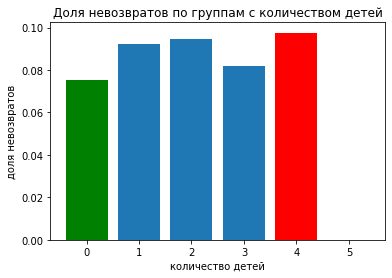

In [23]:
#строим график

x_bar = children_debt_analisys.index
y_bar = children_debt_analisys['доля невозвратов']

p = plt.bar(x_bar, y_bar)
plt.xlabel('количество детей')
plt.ylabel('доля невозвратов')
plt.title("Доля невозвратов по группам с количеством детей")

#выделяем цветом столбцы min(за исключением 0) и max
mask = children_debt_analisys['доля невозвратов'] != 0 #исключаем значение 0 из расчета min
min_color = children_debt_analisys.loc[mask, 'доля невозвратов'].idxmin()
max_color = children_debt_analisys['доля невозвратов'].idxmax()

p.patches[min_color].set_facecolor('green')
p.patches[max_color].set_facecolor('red')

plt.show()

**Вывод:** 

На базе агрегированных данных о количестве невозвратов кредитов по группам респондентов, имеющих одинаковое количество детей, можно предположить наличие связи между количеством детей и вероятностью  невозврата кредита в срок: с увеличением количества детей доля невозвратов растет.

При этом важно отметить необходимость проверки размера выборки от генеральной совокупности и размеров подгрупп от выборки на статистическую значимость (пример - данные по подгруппе с количеством детей "5" и долей невозвратов "0" вызывают сомнение в виду малого количества участников группы - 9 респондентов).

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [24]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

# Создаем отдельную таблицу для анализа. 
# Это не обязательно - можно осуществить группировки и расчет доли невозвратов по подгруппам в переменных и вернуть результат.
# Но для наглядности включаем столбцы с промежуточными данными

marriage_debt_analisys = pd.DataFrame(columns = ['размер_подгруппы','количество_невозвратов'])

marriage_debt_analisys['размер_подгруппы'] = data.groupby('family_status')['debt'].count()
marriage_debt_analisys['количество_невозвратов'] = data.groupby('family_status')['debt'].sum()

# Cчитаем долю невозвратов по подгруппам
marriage_debt_analisys['доля невозвратов'] = marriage_debt_analisys['количество_невозвратов'] / \
marriage_debt_analisys['размер_подгруппы']
                                      
marriage_debt_analisys

,размер_подгруппы,количество_невозвратов,доля невозвратов
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


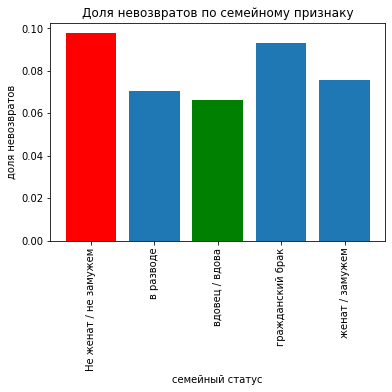

In [25]:
#строим график

x_bar = marriage_debt_analisys.index
y_bar = marriage_debt_analisys['доля невозвратов']

p = plt.bar(x_bar, y_bar)
plt.xlabel('семейный статус')
plt.xticks(rotation=90)
plt.ylabel('доля невозвратов')
plt.title("Доля невозвратов по семейному признаку")

#выделяем цветом столбцы min и max
min_index = marriage_debt_analisys['доля невозвратов'].idxmin()
max_index = marriage_debt_analisys['доля невозвратов'].idxmax()

mask = {'Не женат / не замужем':0, 'в разводе':1, 'вдовец / вдова':2, 'гражданский брак':3, 'женат / замужем':4}

min_color = mask.get(min_index)
max_color = mask.get(max_index)

p.patches[min_color].set_facecolor('green')
p.patches[max_color].set_facecolor('red')

plt.show()

**Вывод:** 

На базе агрегированных данных о количестве невозвратов кредитов по группам респондентов, имеющих одинаковое семейное положение, можно сделать следующие выводы о наличии связи между семейным статусом и вероятностью невозврата кредита в срок: 
- респонденты со статусами "Не женат / не замужем" и "гражданский брак" имеют повышенную долю невозвратов(9,7% и 9,3% соответственно);
- женатые/замужние и разведенные респонденты демонстрируют более высокую финансовую дисциплину с долями невозвратов на уровнях 7,5% и 7,1% соответственно;
- вдовствующие заемщики демонстрируют самый низкий уровень невозвратов на уровне 6,6%.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

# Создаем отдельную таблицу для анализа. 
# Это не обязательно - можно осуществить группировки и расчет доли невозвратов по подгруппам в переменных и вернуть результат.
# Но для наглядности включаем столбцы с промежуточными данными                                
                                    
income_debt_analisys = pd.DataFrame(columns = ['размер_подгруппы','количество_невозвратов'])

income_debt_analisys['размер_подгруппы'] = data.groupby('total_income_category')['debt'].count()
income_debt_analisys['количество_невозвратов'] = data.groupby('total_income_category')['debt'].sum()

#  считаем долю невозвратов по подгруппам
income_debt_analisys['доля невозвратов'] = income_debt_analisys['количество_невозвратов'] / \
income_debt_analisys['размер_подгруппы']
                                      
income_debt_analisys

,размер_подгруппы,количество_невозвратов,доля невозвратов
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


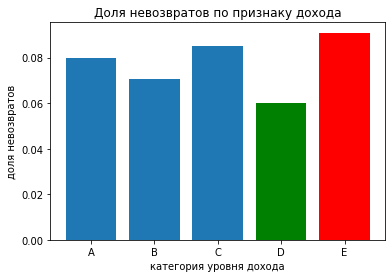

In [27]:
#строим график

x_bar = income_debt_analisys.index
y_bar = income_debt_analisys['доля невозвратов']

p = plt.bar(x_bar, y_bar)
plt.xlabel('категория уровня дохода')
plt.ylabel('доля невозвратов')
plt.title("Доля невозвратов по признаку дохода")

#выделяем цветом столбцы min и max
min_index = income_debt_analisys['доля невозвратов'].idxmin()
max_index = income_debt_analisys['доля невозвратов'].idxmax()

mask = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}

min_color = mask.get(min_index)
max_color = mask.get(max_index)

p.patches[min_color].set_facecolor('green')
p.patches[max_color].set_facecolor('red')

plt.show()

**Вывод:** 

На базе агрегированных данных о количестве невозвратов кредитов по группам респондентов, имеющих схожий уровень дохода, можно сделать ограниченный вывод, что респонденты с более высоким уровнем дохода имеют меньший процент невозвратов: 7,1% (для группы B с доходом от 200 тысяч до 1 млн) против 8,5% (для группы C с доходом от 50 тысяч до 200 тысяч).

По другим группам респондентов (A,D,E) количество данных незначительно, в связи с чем точность оценки крайне низка (для информации сведения отражены в таблице).

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [28]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
#print(data.head(10))
# Создаем отдельную таблицу для анализа. 
# Это не обязательно - можно осуществить группировки и расчет доли невозвратов по подгруппам в переменных и вернуть результат.
# Но для наглядности включаем столбцы с промежуточными данными                                
                                    
purpose_debt_analisys = pd.DataFrame(columns = ['размер_подгруппы','количество_невозвратов'])

purpose_debt_analisys['размер_подгруппы'] = data.groupby('purpose_category')['debt'].count()
purpose_debt_analisys['количество_невозвратов'] = data.groupby('purpose_category')['debt'].sum()

#  считаем долю невозвратов по подгруппам
purpose_debt_analisys['доля невозвратов'] = purpose_debt_analisys['количество_невозвратов'] / \
purpose_debt_analisys['размер_подгруппы']
                                      
purpose_debt_analisys

,размер_подгруппы,количество_невозвратов,доля невозвратов
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


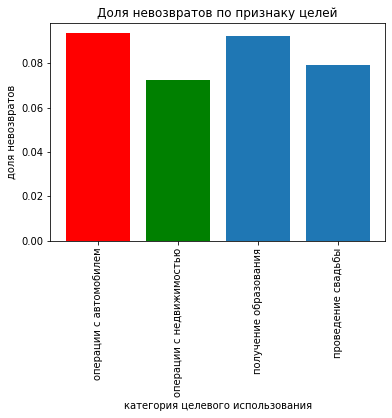

In [29]:
#строим график

x_bar = purpose_debt_analisys.index
y_bar = purpose_debt_analisys['доля невозвратов']

p = plt.bar(x_bar, y_bar)
plt.xlabel('категория целевого использования')
plt.xticks(rotation=90)
plt.ylabel('доля невозвратов')
plt.title("Доля невозвратов по признаку целей")

#выделяем цветом столбцы min и max
min_index = purpose_debt_analisys['доля невозвратов'].idxmin()
max_index = purpose_debt_analisys['доля невозвратов'].idxmax()

mask = {'операции с автомобилем':0, 'операции с недвижимостью':1, 'получение образования':2, 'проведение свадьбы':3}

min_color = mask.get(min_index)
max_color = mask.get(max_index)

p.patches[min_color].set_facecolor('green')
p.patches[max_color].set_facecolor('red')

plt.show()

**Вывод:** 

На базе агрегированных данных о количестве невозвратов кредитов по группам респондентов, имеющих схожее целевое использование, можно сделать следующие выводы о наличии связи между целями кредитования и вероятностью невозврата кредита в срок:
- заемщики, привлекающие кредиты на операции с автомобилями, а также для получения образования имеют более высокий процент невозвратов - по 9,3% для каждой категории;
- заемщики, привлекающие кредиты на операции с недвижимостью и для проведения свадеб, имеют меньший процент невозвратов - 7,3% и 7,9% соответственно.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Количество пропусков в исходных данным по столюцам days_employed и total_income точно совпадает, возможно, связно с некорректным импортом из БД или ошибках при вводе данных респондентами.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Для количественных переменных нет ограничений по диапазону данных, поэтому экстремальное значение (или несколько) может значительно исказить среднее значение данных по выборке.
Медианное значение в таком случае будет более корректным.

### Шаг 4: общий вывод.

По полученным данным была проведена работа по предварительной подготовке данных для анализа: очистка набора от дубликатов и экстремальных ошибочных значений, заполнение пропусков агрегированными сведениями (где это допустимо с учетом целей анализа) и добавлена категоризация сведений по данным дохода и целям кредитования для наглядности итоговых выводов.

Проведенный анализ позволил сделать следующие выводы:

- cвязь невозвратов кредитов с **количеством детей** у респондентов: с увеличением количества детей доля невозвратов растет: при отсутствии детей доля невозвратов составляет 7,5%, при наличии 1 и 2 детей доля невозвратов составляет 9,2% и 9,5% соответственно.
- связь невозвратов кредитов с **семейным статусом** характеризуется более высокими рисками для неженатых заемщиков и находящихся в гражданском браке (уровень невозвратов 9,7% и 9,3% соответственно), по другим категориям уровень невозвратов ниже: женатые - 7,5% и разведенные - 7,1%. Вдовствующие заемщики демонстрируют самый низкий уровень невозвратов на уровне 6,6%.
- связь невозвратов с **уровнем дохода**: респонденты с более высоким уровнем дохода имеют меньший процент невозвратов: 7,1% (для группы с доходом от 200 тысяч до 1 млн) против 8,5% (для группы с доходом от 50 тысяч до 200 тысяч).
- связь невозвратов с **целевым использованием**: заемщики, привлекающие кредиты на операции с автомобилями и для получения образования имеют более высокий процент невозвратов - по 9,3% для каждой категории. В то же время кредиты на операции с недвижимостью и для проведения свадеб, имеют меньший процент невозвратов - 7,3% и 7,9% соответственно.

С учетом вышеуказанных выводов можно сформировать портрет **идеального заемщика** (с точки зрения минимизации риска невозврата) - разведенный/вдовствующий заемщик, без детей, с уровнем дохода от 200 тысяч, привлекающий кредит для операций с недвижимостью. И **нежелательный заемщик** по тем же признакам - неженатый, имеющий 2 детей, с доходом от 50 до 200 тысяч, привлекающий кредит для приобретения автомобиля или получение образования.


Для повышения качества анализа рекомендуется проверить корреткнось выгрузки или сбора данных по признакам количества отработанных дней и размера ежемесячного дохода.

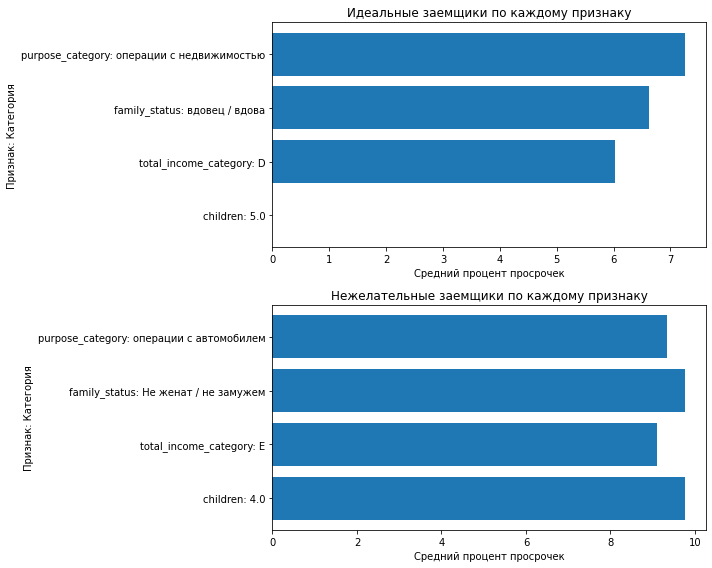

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Функция для агрегации данных по заданному признаку и определения идеальных и нежелательных категорий
def aggregate_and_identify(data, feature):
    # Агрегация данных: среднее значение долга по каждой категории
    grouped_data = data.groupby(feature)['debt'].agg(mean_debt='mean').reset_index()
    
    # Определение идеальной и нежелательной категории
    ideal_category = grouped_data.loc[grouped_data['mean_debt'].idxmin()]
    unwanted_category = grouped_data.loc[grouped_data['mean_debt'].idxmax()]
    
    return ideal_category, unwanted_category

features = ['children', 'total_income_category', 'family_status', 'purpose_category']
ideal_borrowers = []
unwanted_borrowers = []

# Агрегация данных и определение идеальных/нежелательных категорий для каждого признака
for feature in features:
    ideal, unwanted = aggregate_and_identify(data, feature)
    ideal_borrowers.append((feature, ideal[feature], ideal['mean_debt']*100)) # Преобразуем долю в проценты
    unwanted_borrowers.append((feature, unwanted[feature], unwanted['mean_debt']*100))

# Преобразование списков в DataFrame для удобства визуализации
df_ideal = pd.DataFrame(ideal_borrowers, columns=['Feature', 'Category', 'Mean Debt (%)'])
df_unwanted = pd.DataFrame(unwanted_borrowers, columns=['Feature', 'Category', 'Mean Debt (%)'])

# Визуализация результатов
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Идеальные заемщики
ax[0].barh(df_ideal['Feature'] + ': ' + df_ideal['Category'].astype(str), df_ideal['Mean Debt (%)'])
ax[0].set_title('Идеальные заемщики по каждому признаку')
ax[0].set_xlabel('Средний процент просрочек')
ax[0].set_ylabel('Признак: Категория')

# Нежелательные заемщики
ax[1].barh(df_unwanted['Feature'] + ': ' + df_unwanted['Category'].astype(str), df_unwanted['Mean Debt (%)'])
ax[1].set_title('Нежелательные заемщики по каждому признаку')
ax[1].set_xlabel('Средний процент просрочек')
ax[1].set_ylabel('Признак: Категория')

plt.tight_layout()
plt.show()